# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 595


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        weather_json = city_weather.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = weather_json['coord']['lat']
        city_lng = weather_json['coord']['lon']
        city_max_temp = weather_json['main']['temp_max']
        city_humidity =weather_json['main']['humidity']
        city_clouds = weather_json['clouds']['all']
        city_wind = weather_json['wind']['speed']
        city_country = weather_json['sys']['country']
        city_date = weather_json['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | smara
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | kaspiyskiy
Processing Record 5 of Set 1 | edinburgh of the seven seas
Processing Record 6 of Set 1 | tranovaho
City not found. Skipping...
Processing Record 7 of Set 1 | yellowknife
Processing Record 8 of Set 1 | thompson
Processing Record 9 of Set 1 | ta`u
Processing Record 10 of Set 1 | wailua homesteads
Processing Record 11 of Set 1 | bardai
Processing Record 12 of Set 1 | fort st. john
Processing Record 13 of Set 1 | bethel
Processing Record 14 of Set 1 | kolonia town
Processing Record 15 of Set 1 | vernon
Processing Record 16 of Set 1 | san patricio
Processing Record 17 of Set 1 | grytviken
Processing Record 18 of Set 1 | oppdal
Processing Record 19 of Set 1 | kalmunai
Processing Record 20 of Set 1 | papatowai
Processing Record 21 of Set 1 | georgetown
Processing Reco

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,smara,26.7384,-11.6719,25.82,24,0,12.57,EH,1712589251
1,waitangi,-43.9535,-176.5597,12.68,83,68,0.89,NZ,1712589782
2,port-aux-francais,-49.3500,70.2167,6.81,86,41,12.63,TF,1712589252
3,kaspiyskiy,45.3929,47.3707,13.10,58,0,4.54,RU,1712589253
4,edinburgh of the seven seas,-37.0676,-12.3116,18.51,92,100,9.07,SH,1712589253


In [68]:
# convert date format
city_data_df['Date']=(pd.to_datetime(city_data_df['Date'],unit='s')).dt.date
city_data_df.head()

#reference https://github.com/Borruu/python-api-challenge/blob/main/WeatherPy/WeatherPy.ipynb

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,smara,26.7384,-11.6719,25.82,24,0,12.57,EH,2024-04-08
1,waitangi,-43.9535,-176.5597,12.68,83,68,0.89,NZ,2024-04-08
2,port-aux-francais,-49.3500,70.2167,6.81,86,41,12.63,TF,2024-04-08
3,kaspiyskiy,45.3929,47.3707,13.10,58,0,4.54,RU,2024-04-08
4,edinburgh of the seven seas,-37.0676,-12.3116,18.51,92,100,9.07,SH,2024-04-08


In [69]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [70]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,smara,26.7384,-11.6719,25.82,24,0,12.57,EH,2024-04-08
1,waitangi,-43.9535,-176.5597,12.68,83,68,0.89,NZ,2024-04-08
2,port-aux-francais,-49.3500,70.2167,6.81,86,41,12.63,TF,2024-04-08
3,kaspiyskiy,45.3929,47.3707,13.10,58,0,4.54,RU,2024-04-08
4,edinburgh of the seven seas,-37.0676,-12.3116,18.51,92,100,9.07,SH,2024-04-08


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [72]:
Date = city_data_df['Date'][0]
Date

'2024-04-08'

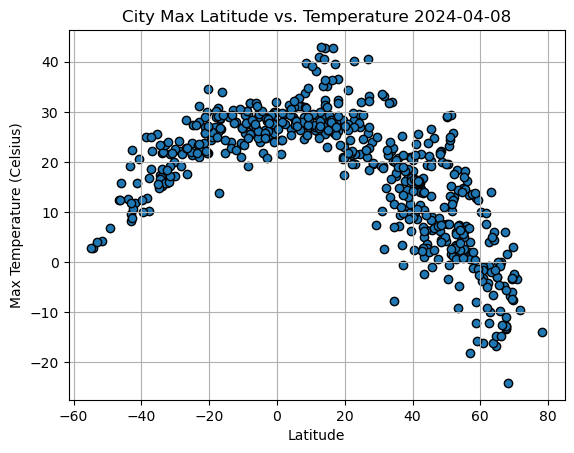

In [73]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")

# Incorporate the other graph properties
Date = city_data_df['Date'][0]
plt.title(f"City Max Latitude vs. Temperature {Date}")
plt.ylabel("Max Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

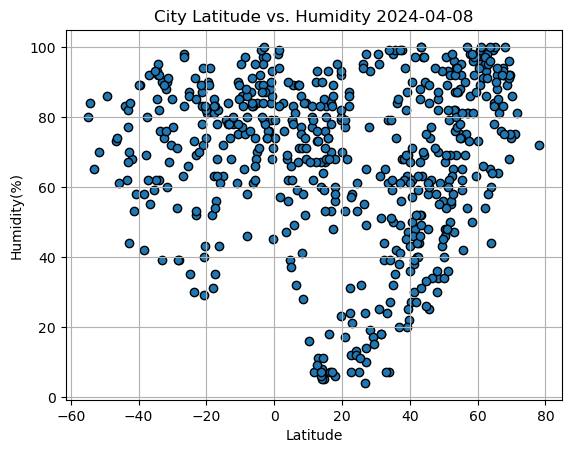

In [74]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity {Date}")
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

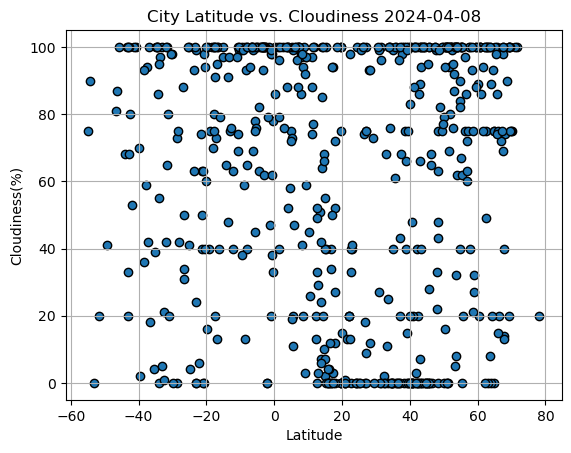

In [75]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black")

# Incorporate the other graph properties

plt.title(f"City Latitude vs. Cloudiness {Date}")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

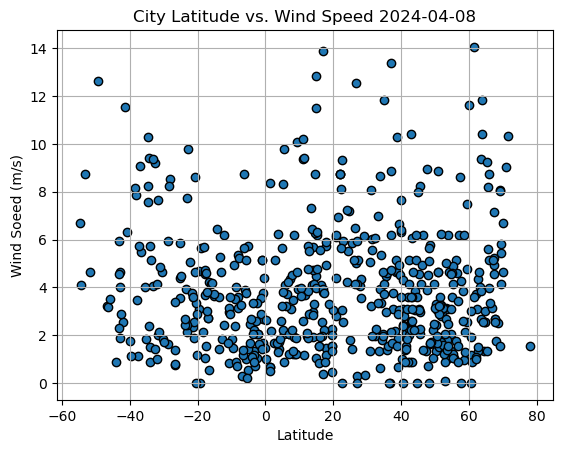

In [76]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed {Date}")
plt.ylabel("Wind Soeed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [77]:
# Define a function to create Linear Regression plots
def createLinearRegressionPlot(x_values, y_values, x_label, y_label, name, hemisphere,line_placement):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    
    # Plot regression line
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,line_placement,fontsize=15,color="red")
    
    # Label plot
    plt.xlabel(x_label)                              
    plt.ylabel(y_label)
    plt.title(name)
    
    # Print r square value
    print(f"R squared: {rvalue**2}")
    plt.savefig(f"output_data/{name}.png")



In [78]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,smara,26.7384,-11.6719,25.82,24,0,12.57,EH,2024-04-08
3,kaspiyskiy,45.3929,47.3707,13.10,58,0,4.54,RU,2024-04-08
5,yellowknife,62.4560,-114.3525,-0.88,86,75,3.09,CA,2024-04-08
6,thompson,55.7435,-97.8558,7.09,42,20,1.03,CA,2024-04-08
8,wailua homesteads,22.0669,-159.3780,21.44,87,20,8.75,US,2024-04-08


In [79]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,waitangi,-43.9535,-176.5597,12.68,83,68,0.89,NZ,2024-04-08
2,port-aux-francais,-49.3500,70.2167,6.81,86,41,12.63,TF,2024-04-08
4,edinburgh of the seven seas,-37.0676,-12.3116,18.51,92,100,9.07,SH,2024-04-08
7,ta`u,-14.2336,-169.5144,29.04,79,65,6.43,AS,2024-04-08
15,grytviken,-54.2811,-36.5092,2.76,84,90,4.11,GS,2024-04-08


###  Temperature vs. Latitude Linear Regression Plot

R squared: 0.6972456732481666


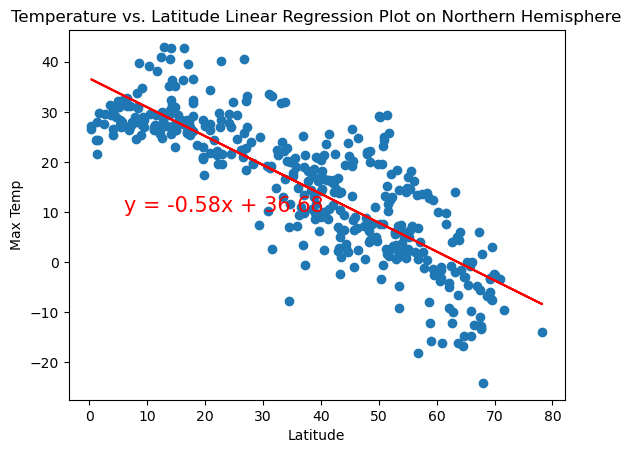

there is a negative correlation between temperature and latitude as the latitude move further from the equator, the temperature decrease.


In [80]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"].astype("float")
y_values = northern_hemi_df["Max Temp"].astype("float")
name = "Temperature vs. Latitude Linear Regression Plot on Northern Hemisphere"


createLinearRegressionPlot(x_values, y_values, "Latitude", "Max Temp", "Temperature vs. Latitude Linear Regression Plot on Northern Hemisphere","North",(6,10))

plt.show()

print ("there is a negative correlation between temperature and latitude as the latitude move further from the equator, the temperature decrease.")

R squared: 0.6129260964774006


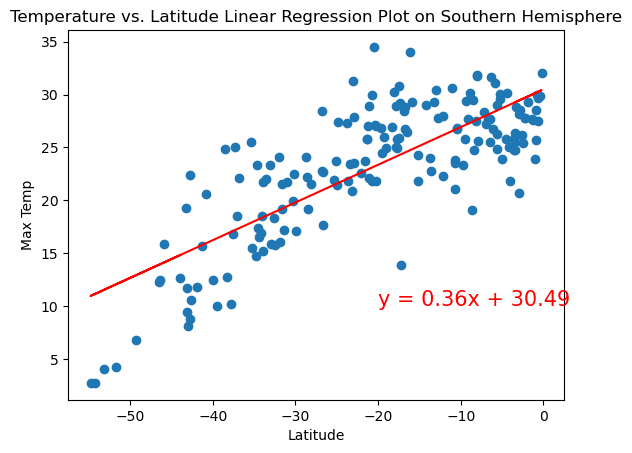

there is a positive relationshup between temperature and latitude for Southern Hemisphere as the latitude move further from the equator, the temperature increases.


In [81]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"].astype("float")
y_values = southern_hemi_df["Max Temp"].astype("float")
name = "Temperature vs. Latitude Linear Regression Plot on Southern Hemisphere"

createLinearRegressionPlot(x_values, y_values, "Latitude", "Max Temp", "Temperature vs. Latitude Linear Regression Plot on Southern Hemisphere","South",(-20,10))

plt.show()

print ("there is a positive relationshup between temperature and latitude for Southern Hemisphere as the latitude move further from the equator, the temperature increases.")

**Discussion about the linear relationship:** there is a positive correlation between temperature and latitude for southern Hemisphere. The temperature increases as the country is located the further South of the equator. There is a negative correlation between temperature and latitude for Northern Hemisphere. The temperature decreases as the country is located further north of the equator. 

### Humidity vs. Latitude Linear Regression Plot

R squared: 0.06753908264792238


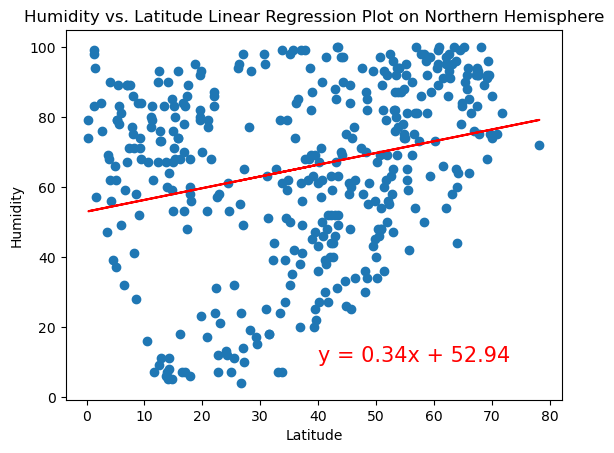

In [82]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"].astype("float")
y_values = northern_hemi_df["Humidity"].astype("float")
name = "Humidity vs. Latitude Linear Regression Plot on Northern Hemisphere"

createLinearRegressionPlot(x_values, y_values, "Latitude", "Humidity", "Humidity vs. Latitude Linear Regression Plot on Northern Hemisphere","North",(40,10))

plt.show()

R squared: 0.029322482292249957


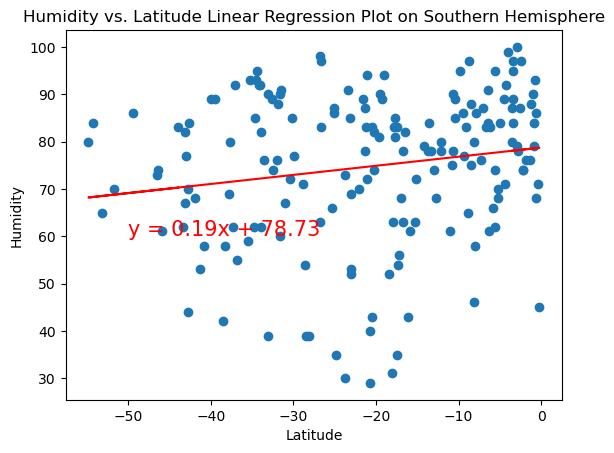

In [59]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"].astype("float")
y_values = southern_hemi_df["Humidity"].astype("float")
name = "Humidity vs. Latitude Linear Regression Plot on Southern Hemisphere"

createLinearRegressionPlot(x_values, y_values, "Latitude", "Humidity", "Humidity vs. Latitude Linear Regression Plot on Southern Hemisphere","South",(-50,60))

plt.show()

**Discussion about the linear relationship:** It doesnt seem there is any relationship between the humidity and latitude for both North and South Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

R squared: 0.01885616414401409


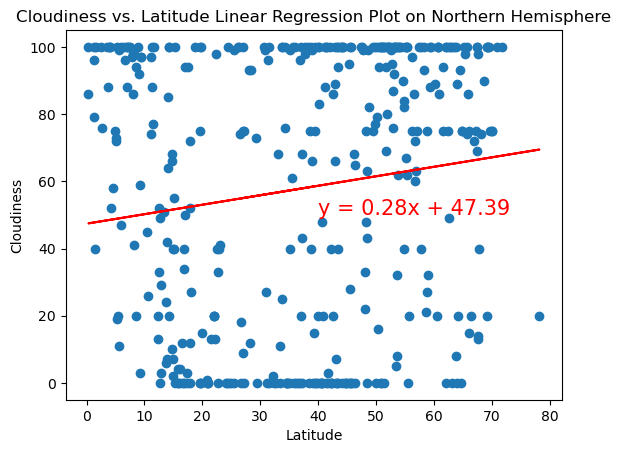

In [83]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"].astype("float")
y_values = northern_hemi_df["Cloudiness"].astype("float")
name = "Cloudiness vs. Latitude Linear Regression Plot on Northern Hemisphere"

createLinearRegressionPlot(x_values, y_values, "Latitude", "Cloudiness", "Cloudiness vs. Latitude Linear Regression Plot on Northern Hemisphere","North",(40,50))

plt.show()

R squared: 0.03980807989849849


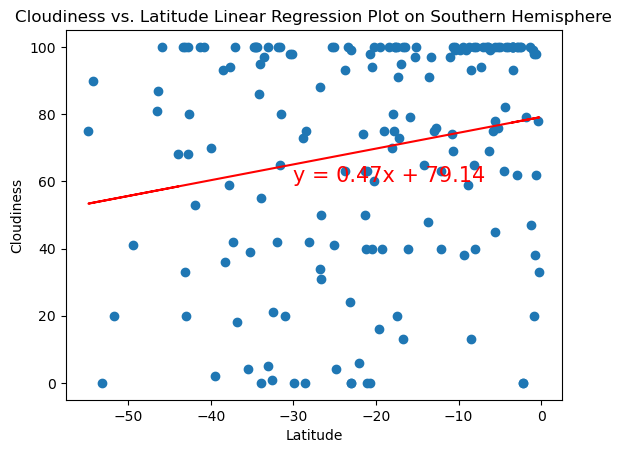

In [84]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"].astype("float")
y_values = southern_hemi_df["Cloudiness"].astype("float")
name = "Cloudiness vs. Latitude Linear Regression Plot on Southern Hemisphere"

createLinearRegressionPlot(x_values, y_values, "Latitude", "Cloudiness", "Cloudiness vs. Latitude Linear Regression Plot on Southern Hemisphere","South",(-30,60))

plt.show()

**Discussion about the linear relationship:** There is a very weak positive correlation to no relationship between the cloudiness and latitude based on the above two graphs as the plots are very spreaded out. 

### Wind Speed vs. Latitude Linear Regression Plot

R squared: 1.552372968418015e-05


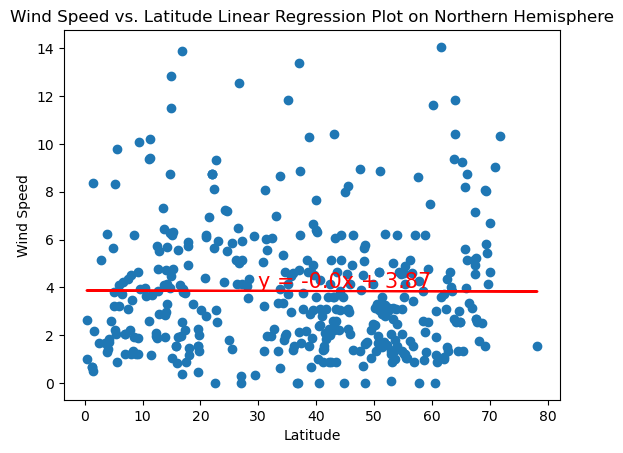

In [85]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"].astype("float")
y_values = northern_hemi_df["Wind Speed"].astype("float")
name = "Wind Speed vs. Latitude Linear Regression Plot on Northern Hemisphere"

createLinearRegressionPlot(x_values, y_values, "Latitude", "Wind Speed", "Wind Speed vs. Latitude Linear Regression Plot on Northern Hemisphere","North",(30,4))

plt.show()

R squared: 0.12783629153432147


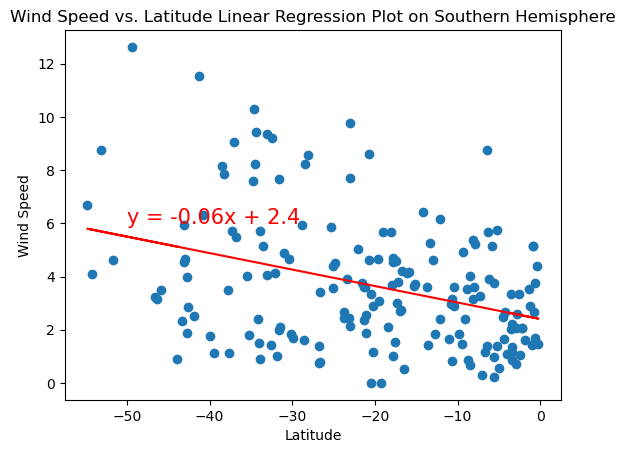

In [86]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"].astype("float")
y_values = southern_hemi_df["Wind Speed"].astype("float")
name = "Wind Speed vs. Latitude Linear Regression Plot on Southern Hemisphere"

createLinearRegressionPlot(x_values, y_values, "Latitude", "Wind Speed", "Wind Speed vs. Latitude Linear Regression Plot on Southern Hemisphere","South",(-50,6))

plt.show()

**Discussion about the linear relationship:** Both graphs show very weak negaitve correlation between wind speed and latitude. We can also conclude that there is no relationship between wind speed and latitude. 